<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [130]:
# insert code here
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [45]:
# insert code here

data = load_diabetes()
#df = pd.DataFrame(data['data'])

### Prepare input data

In [49]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [161]:
X = data['data']
y = data['target']
features = data['feature_names']

In [162]:
# insert code here
X = pd.DataFrame(data=X, columns=features)

In [163]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [164]:
len(y)

442

### Split the data (training/test)

In [165]:
# insert code here

from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1 )

### Create the model's architecture

In [167]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(192, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='relu'))

learn=0.001
opt = Adam(learn)


In [168]:
# model = keras.Sequential()
# for i in range(20):
#     model.add(keras.layers.Dense(192, input_dim=10, activation='relu'))
# model.add(keras.layers.Dense(1, activation='relu'))

### Compile the model

In [170]:
# insert code here
learn=0.001
opt = Adam(learn)
model.compile(optimizer=opt,
             loss='mean_squared_error')


### Fit the training data

In [171]:
%%time
# insert code here
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

history = model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test)




Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 30037.2910
Epoch 2/100
10/10 [==============================] - 0s 929us/step - loss: 29997.3398
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 29830.4102
Epoch 4/100
10/10 [==============================] - 0s 992us/step - loss: 29241.9961
Epoch 5/100
10/10 [==============================] - 0s 871us/step - loss: 27495.4570
Epoch 6/100
10/10 [==============================] - 0s 1000us/step - loss: 22956.1367
Epoch 7/100
10/10 [==============================] - 0s 861us/step - loss: 14687.4551
Epoch 8/100
10/10 [==============================] - 0s 886us/step - loss: 5660.0874
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 5050.7412
Epoch 10/100
10/10 [==============================] - 0s 776us/step - loss: 4076.1670
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 3869.9089
Epoch 12/100
10/10 [==============================] - 0s 887us/

10/10 [==============================] - 0s 665us/step - loss: 2764.8494
Epoch 97/100
10/10 [==============================] - 0s 997us/step - loss: 2784.5403
Epoch 98/100
10/10 [==============================] - 0s 776us/step - loss: 2835.4570
Epoch 99/100
10/10 [==============================] - 0s 776us/step - loss: 2800.0088
Epoch 100/100
10/10 [==============================] - 0s 887us/step - loss: 2769.9690
Wall time: 1.47 s


### Create predictions

### Evaluate the model

In [172]:
# insert code here

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2820.270772301402
0.43980771091672244


### Visualisation of cost

In [173]:
# insert code here

history_dict = history.history

In [174]:
len(history_dict['loss'])

100

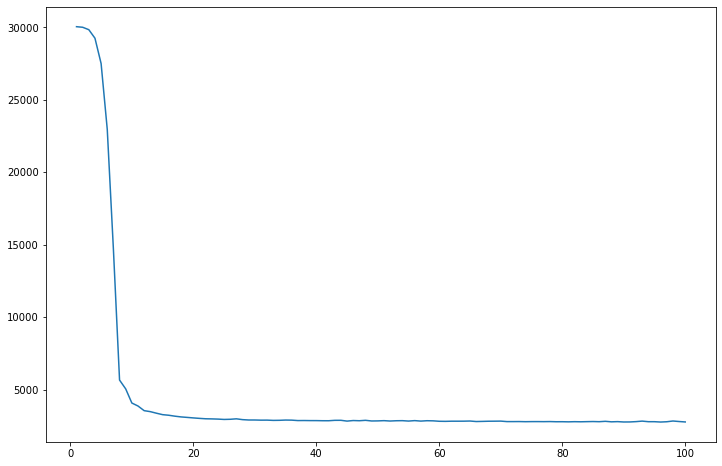

In [175]:
length = len(history_dict['loss'])

plt.figure(figsize=(12,8))
plt.plot(range(1, length+1), history_dict['loss'])
plt.show()

### Visualisation of residuals

In [0]:
# insert code here



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



